# 0.2 Data Wranling

- Consiste en la manipulación, limpieza y unificación de conjuntos de datos complejos y desordenados para facilitar su acceso,análisis y modelado.El bproceso incluye convertir y mapear los datos crudos,y dejarlos en un formato más adecuado para su uso.
- Tenemos consideración especial es este apartado ya que entendemos que aproximadamente el 60% del esfuerzo de un trabajo de Data Science
consiste en Data Wrangling.
- Las etapas se componen en descubrimiento, estructuración, limpieza, enriquecimiento, validación, pubicación.

### Observaciones
Como tenemos dos datasets vamos a trabajarlos por separado en primera instancia para ver como los podemos unificar luego y hacer un analisis integrado. 
- En este notebook 0.2-wines-data.wranling.ipynb vamos a trabajar con los datos de los wines_dataset.csv
- En el notebook 0.2-wines.spa-data.wranling.ipynb vamos a trabajar con los datos de los wines_SPA.csv

## Import libraries

In [1]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [4]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.visualization.analysis_univariate import univariate_analysis
import src.utils.statistics as stats

## Set up

In [5]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

In [6]:
# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [7]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINE_RAW_CSV_PATH = data_dir("raw", "wine_dataset.csv")

WINE_RAW_CSV_PATH

WindowsPath('c:/Users/xpam08/Desktop/SOFI/CODERHOUSE/DATA SCIENCE/vinos-corderhouse/data/raw/wine_dataset.csv')

In [8]:
# Leemos los csv's y los guardamos en un dataframe
df_wine = pd.read_csv(WINE_RAW_CSV_PATH)

# Wine Dataset

### Descubrimiento y estructuración
- Comprender los datos la estructura, tipos y calidad

In [9]:
# Shape de los datos
shape_df =df_wine.shape
print(f"{shape_df=}")

shape_df=(6497, 13)


In [10]:
# Vista previa de 5 datos aleatorios
df_wine.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
2294,6.3,0.34,0.28,14.70,0.047,49.0,198.0,0.99770,3.23,0.46,9.5,5,white
4788,6.6,0.19,0.33,1.80,0.035,42.0,148.0,0.99196,3.15,0.36,10.2,5,white
4795,6.4,0.22,0.38,9.10,0.044,35.0,127.0,0.99326,2.97,0.30,11.0,7,white
326,11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,7,red
3367,6.6,0.37,0.07,1.40,0.048,58.0,144.0,0.99220,3.17,0.38,10.0,5,white


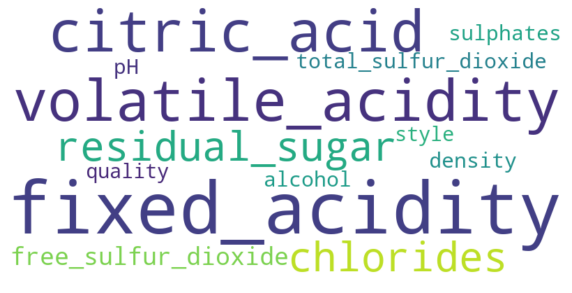

In [11]:
#Mostramos las columnas del dataframe
words_cloud(list(df_wine.columns))

In [12]:
# Obtenemos información de las columnas de los datos
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
# Mostramos las principales estadisticas de las columnas
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [14]:
print (f"Hay {shape_df[0]} filas y {shape_df[1]} columnas en el dataset de wine")
print (f"Hay {df_wine['style'].nunique()} estilos de vino de como lo son {' y '.join(df_wine['style'].unique()[0:5])}")
print (f"El promedio de alcohol es {round(df_wine['alcohol'].mean(), 3)} y su mediana es {round(df_wine['alcohol'].median(), 3)}")
print (f"El promedio de quality es {round(df_wine['quality'].mean(), 3)} y su mediana es {round(df_wine['quality'].median(), 3)}")

Hay 6497 filas y 13 columnas en el dataset de wine
Hay 2 estilos de vino de como lo son red y white
El promedio de alcohol es 10.492 y su mediana es 10.3
El promedio de quality es 5.818 y su mediana es 6.0


## Missing values

Determinamos si en el dataset hay valores faltantes.

In [15]:
df_wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

<AxesSubplot:>

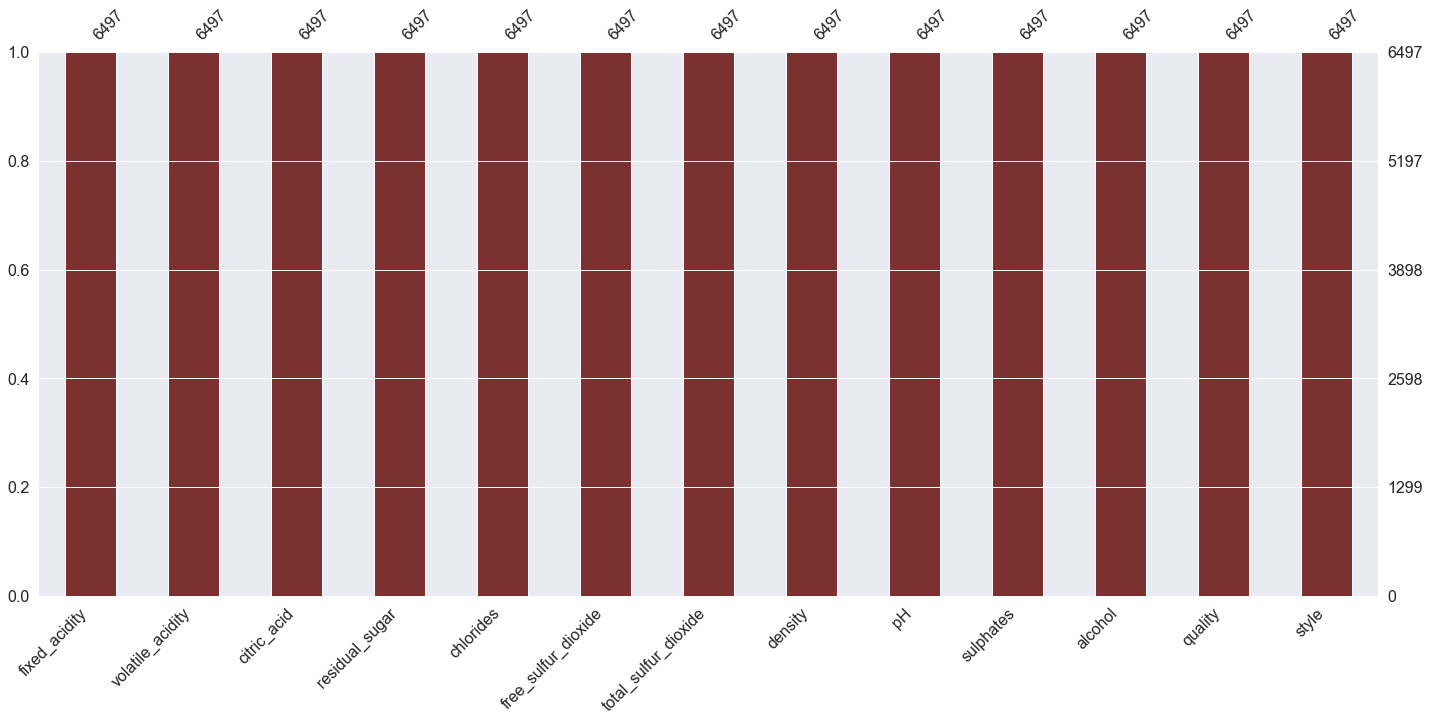

In [16]:
# Visualizamos los missings utilizando la libreria missingno
msno.bar(df_wine, color= COLOR_VINO_TINTO)


Observamos que el dataset no tiene missing values en ninguna de sus columnas

## Outliers

Analizaremos los outliers de las columnas y la consistencia de los datos. En esta parte del proceso nos apoyaremos en el analisis univariado a fin de profundizar en el data wrangling y poder limpiar antes de mergear los datasets. En la seccion de EDA trabajaremos con un dataset mergeado y ahi aplicaremos analisis bivariado y multivariado.

In [17]:
# Definimos una lista vacia que representa las filas que queremos eliminar.
rows_to_drop = []

### Style

In [18]:
# Verificamos los valores unicos de una columna categorica que tenemos: style, y observamos la cantidad de valores de cada uno
style_counts = df_wine['style'].value_counts(normalize = True)
style_counts

white    0.753886
red      0.246114
Name: style, dtype: float64

<AxesSubplot:>

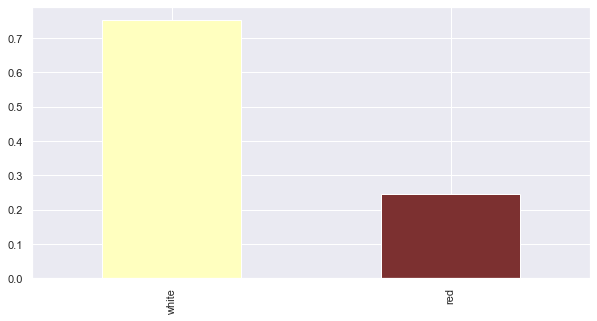

In [19]:
# Grafico de barras para representar la cantidad de vinos por estilo
style_counts.plot(kind = 'bar', color =[COLOR__VINO_BLANCO, COLOR_VINO_TINTO])


In [20]:
print(f"Los vinos blancos representan el {round(style_counts.white * 100, 2)} % de los vinos")
print(f"Los vinos tintos representan el {round(style_counts.red * 100, 2)} % de los vinos")

Los vinos blancos representan el 75.39 % de los vinos
Los vinos tintos representan el 24.61 % de los vinos


### Quality

### Descripcion de la columna quality 

count    6497.000
mean        5.818
std         0.873
min         3.000
25%         5.000
50%         6.000
75%         6.000
max         9.000
Name: quality, dtype: float64


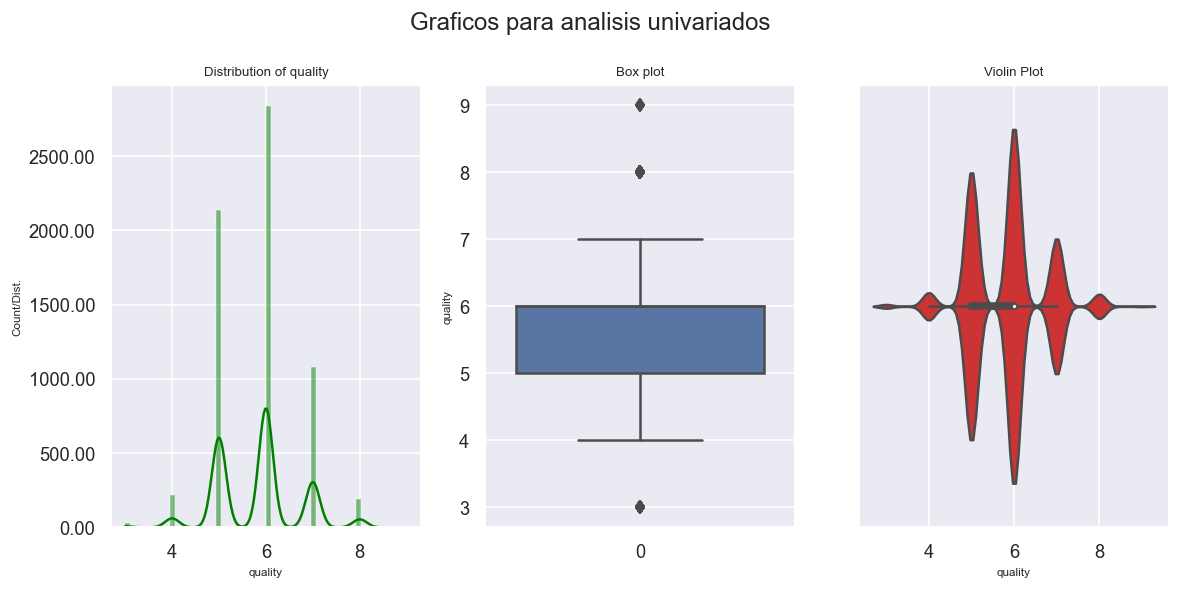

In [21]:
univariate_analysis(dataframe=df_wine, column_name='quality')

A traves de los graficos podemos ver que existen outliers en la columna quality.

In [22]:
# Filtramos las filas donde quality es menor a 4
quality_lees_four = df_wine[(df_wine['quality'] < 4)]
# Filtramos las filas donde quality es mayor a 7
quality_greater_seven = df_wine[(df_wine['quality'] > 7)]
# Representacion en porcentaje de los vinos que tienen una calidad menor a 4
print(f"El {round(quality_lees_four['quality'].count() * 100 / df_wine['quality'].count(), 2)} % de los vinos tienen una calidad menor a 4")
# Representacion en porcentaje de los vinos que tienen una calidad mayor a 7
print(f"El {round(quality_greater_seven['quality'].count() * 100 / df_wine['quality'].count(), 2)} % de los vinos tienen una calidad mayor a 7")

El 0.46 % de los vinos tienen una calidad menor a 4
El 3.05 % de los vinos tienen una calidad mayor a 7


El 3.05% de los datos nos parece significativo, por lo que veremos que pasa con los que son mayores a 8

In [23]:
# Filtramos las filas donde quality es mayor a 8
quality_greater_eight = df_wine[(df_wine['quality'] > 8)]
# Representacion en porcentaje de los vinos que tienen una calidad mayor a 8
print(f"El {round(quality_greater_eight['quality'].count() * 100 / df_wine['quality'].count(), 2)} % de los vinos tienen una calidad mayor a 8")

El 0.08 % de los vinos tienen una calidad mayor a 8


In [24]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(quality_lees_four.index)
rows_to_drop.extend(quality_greater_eight.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 35


## Alcohol

### Descripcion de la columna alcohol 

count    6497.000
mean       10.492
std         1.193
min         8.000
25%         9.500
50%        10.300
75%        11.300
max        14.900
Name: alcohol, dtype: float64


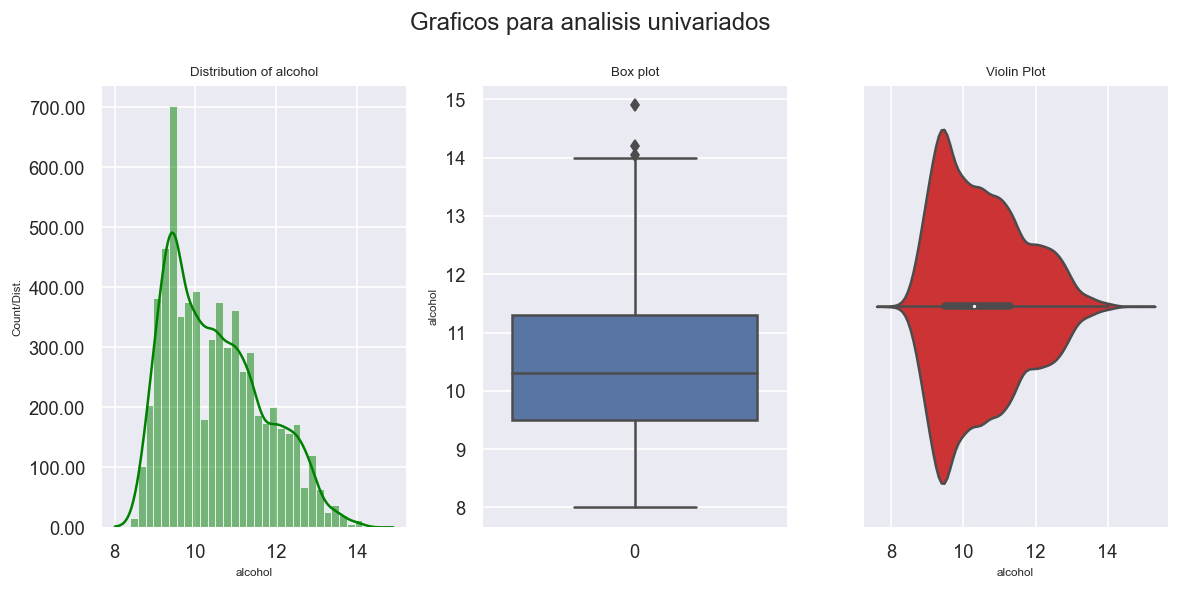

In [25]:
univariate_analysis(dataframe=df_wine, column_name='alcohol')

A traves de los graficos podemos ver que existen outliers en la columna quality.

In [26]:
# Filtramos las filas donde alcohol es mayor a 14
alcohol_greater_fourteen = df_wine[(df_wine['alcohol'] > 14)]
# Representacion en porcentaje de los vinos que tienen un alcohol mayor a 14
print(f"El {round(alcohol_greater_fourteen['alcohol'].count() * 100 / df_wine['alcohol'].count(), 2)} % de los vinos tienen un alcohol mayor a 14")

El 0.05 % de los vinos tienen un alcohol mayor a 14


In [27]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(alcohol_greater_fourteen.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 38


## Sulphates

### Descripcion de la columna sulphates 

count    6497.000
mean        0.531
std         0.149
min         0.220
25%         0.430
50%         0.510
75%         0.600
max         2.000
Name: sulphates, dtype: float64


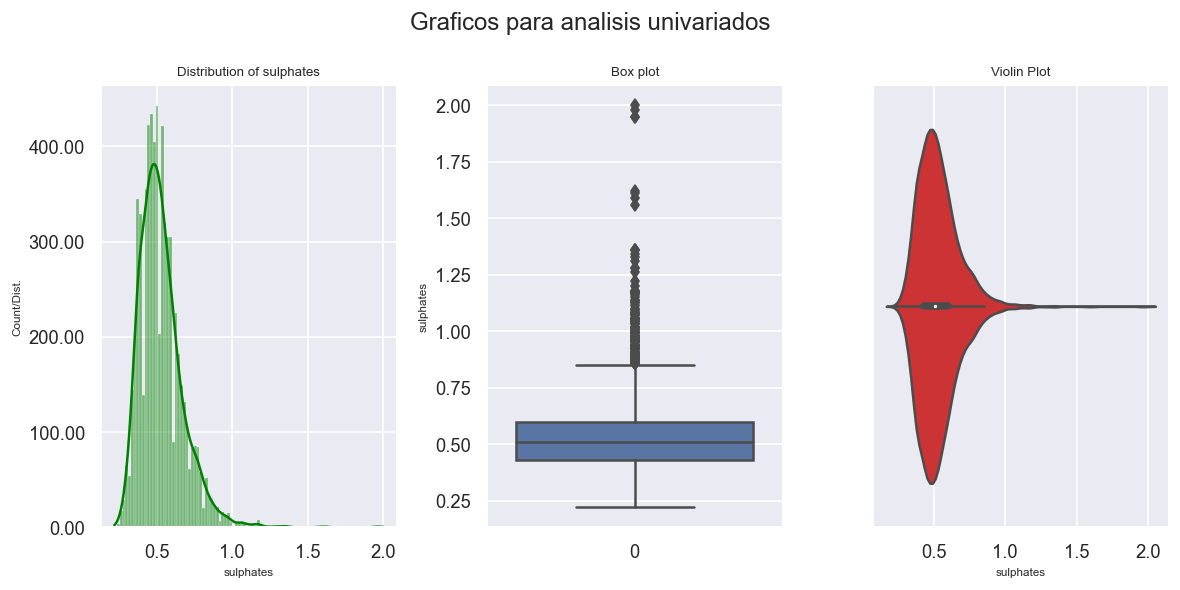

In [28]:
univariate_analysis(dataframe=df_wine, column_name='sulphates')

A traves de los graficos podemos ver que existen outliers en la columna sulphates.

In [29]:
# Determinamos el valor limite para los outliers superiores
sulphates_upper_limit = stats.get_upper_limit_whisker(df_wine['sulphates']).round(3)

# Filtramos las filas donde sulphates es mayor a la limite superior del boxplot
sulphates_greater_upper_limit = df_wine[(df_wine['sulphates'] > sulphates_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un sulfatos mayor a la limite superior del boxplot
print(f"El {round(sulphates_greater_upper_limit['sulphates'].count() * 100 / df_wine['sulphates'].count(), 2)} % de los vinos tienen sulfatos mayor a {sulphates_upper_limit}")

El 2.94 % de los vinos tienen sulfatos mayor a 0.855


In [30]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(sulphates_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 228


## PH

### Descripcion de la columna pH 

count    6497.000
mean        3.219
std         0.161
min         2.720
25%         3.110
50%         3.210
75%         3.320
max         4.010
Name: pH, dtype: float64


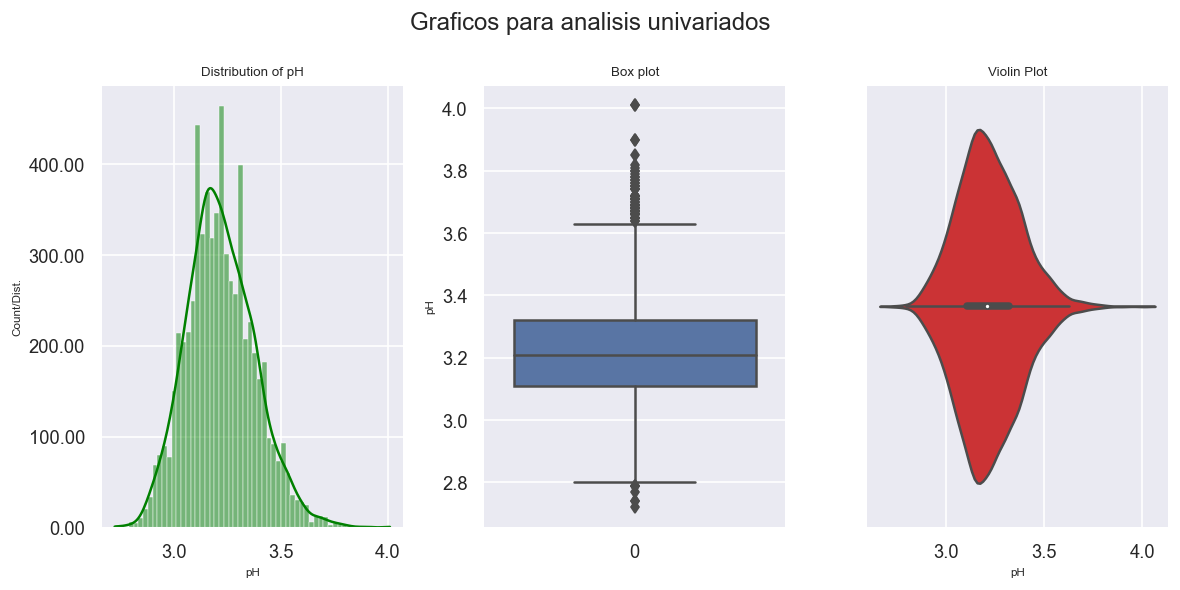

In [31]:
# Analisis univariado de la columna pH
univariate_analysis(dataframe=df_wine, column_name='pH')

In [32]:
# Determinamos el valor limite para los outliers superiores
pH_upper_limit = stats.get_upper_limit_whisker(df_wine['pH']).round(3)
# Deterimos el valor limite para los outliers inferiores
pH_lower_limit = stats.get_lower_limit_whisker(df_wine['pH']).round(3)
# Filtramos las filas donde pH es mayor a la limite superior del boxplot
pH_greater_upper_limit = df_wine[(df_wine['pH'] > pH_upper_limit)]
# Filtramos las filas donde pH es mayor a la limite inferior del boxplot
pH_less_lower_limit = df_wine[(df_wine['pH'] < pH_lower_limit)]
# Representacion en porcentaje de los vinos que tienen un pH mayor a la limite superior del boxplot
print(f"El {round(pH_greater_upper_limit['pH'].count() * 100 / df_wine['pH'].count(), 2)} % de los vinos tienen un pH mayor a {pH_upper_limit}")
# Representacion en porcentaje de los vinos que tienen un pH mayor a la limite inferior del boxplot
print(f"El {round(pH_less_lower_limit['pH'].count() * 100 / df_wine['pH'].count(), 2)} % de los vinos tienen un pH menor a {pH_lower_limit}")


El 1.02 % de los vinos tienen un pH mayor a 3.635
El 0.11 % de los vinos tienen un pH menor a 2.795


In [33]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(pH_greater_upper_limit.index)
rows_to_drop.extend(pH_less_lower_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 297


## Density

### Descripcion de la columna density 

count    6497.000
mean        0.995
std         0.003
min         0.987
25%         0.992
50%         0.995
75%         0.997
max         1.039
Name: density, dtype: float64


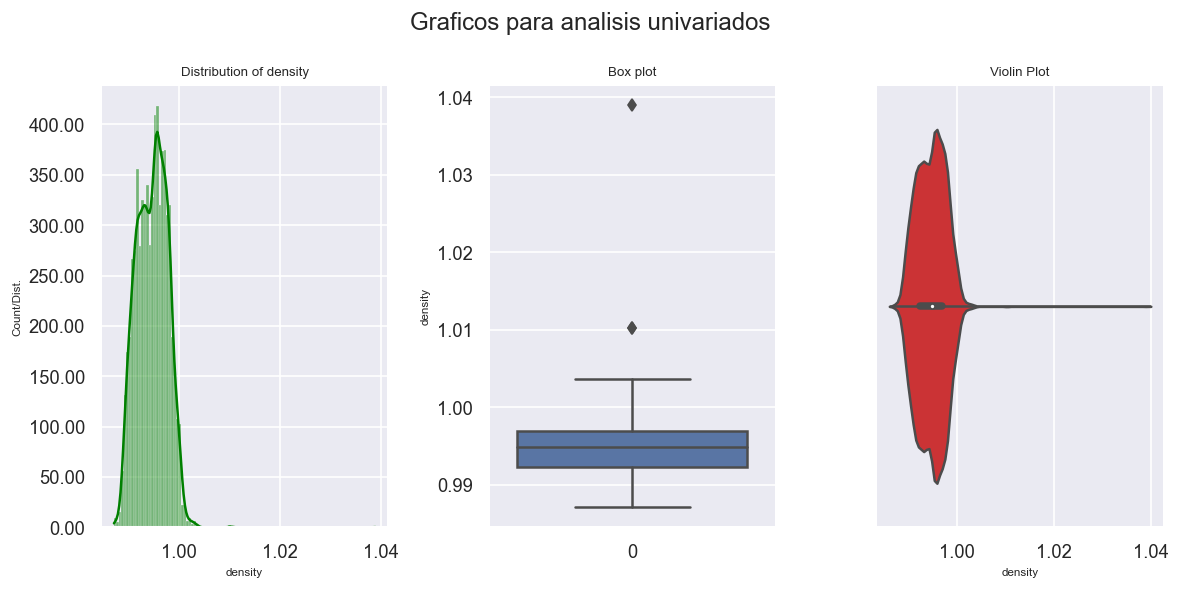

In [34]:
# Analisis univariado de la columna density
univariate_analysis(dataframe=df_wine, column_name='density')

In [35]:
# Determinamos el valor limite para los outliers superiores
density_upper_limit = stats.get_upper_limit_whisker(df_wine['density']).round(3)
# Filtramos las filas donde density es mayor a la limite superior del boxplot
density_greater_upper_limit = df_wine[(df_wine['density'] > density_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un density mayor a la limite superior del boxplot
print(f"El {round(density_greater_upper_limit['density'].count() * 100 / df_wine['density'].count(), 2)} % de los vinos tienen un density mayor a {density_upper_limit}")

El 0.05 % de los vinos tienen un density mayor a 1.004


In [36]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(density_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 300


## Total sulfur dioxide

### Descripcion de la columna total_sulfur_dioxide 

count    6497.000
mean      115.745
std        56.522
min         6.000
25%        77.000
50%       118.000
75%       156.000
max       440.000
Name: total_sulfur_dioxide, dtype: float64


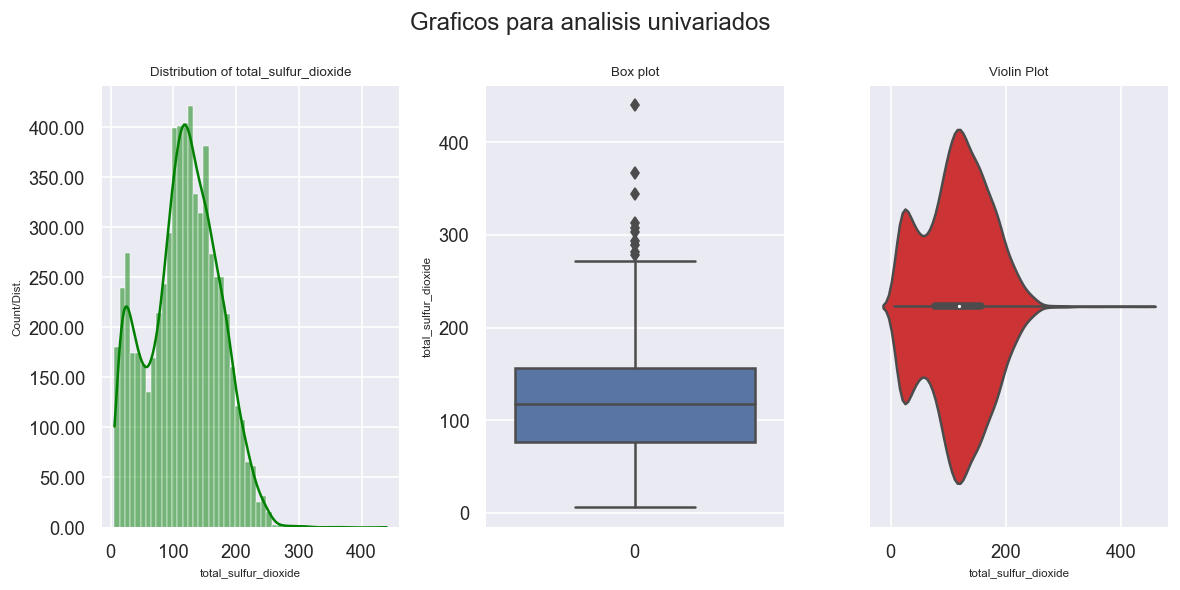

In [37]:
# Analisis univariado de la columna total_sulfur_dioxide
univariate_analysis(dataframe=df_wine, column_name='total_sulfur_dioxide')

In [38]:
# Determinamos el valor limite para los outliers superiores
sulfur_dioxide_upper_limit = stats.get_upper_limit_whisker(df_wine['total_sulfur_dioxide']).round(3)
# Filtramos las filas donde total_sulfur_dioxide es mayor a la limite superior del boxplot
sulfur_dioxide_greater_upper_limit = df_wine[(df_wine['total_sulfur_dioxide'] > sulfur_dioxide_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un total_sulfur_dioxide mayor a la limite superior del boxplot
print(f"El {round(sulfur_dioxide_greater_upper_limit['total_sulfur_dioxide'].count() * 100 / df_wine['total_sulfur_dioxide'].count(), 2)} % de los vinos tienen un total_sulfur_dioxide mayor a {sulfur_dioxide_upper_limit}")

El 0.15 % de los vinos tienen un total_sulfur_dioxide mayor a 274.5


In [39]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(sulfur_dioxide_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 307


## Free sulfur dioxide

### Descripcion de la columna free_sulfur_dioxide 

count    6497.000
mean       30.525
std        17.749
min         1.000
25%        17.000
50%        29.000
75%        41.000
max       289.000
Name: free_sulfur_dioxide, dtype: float64


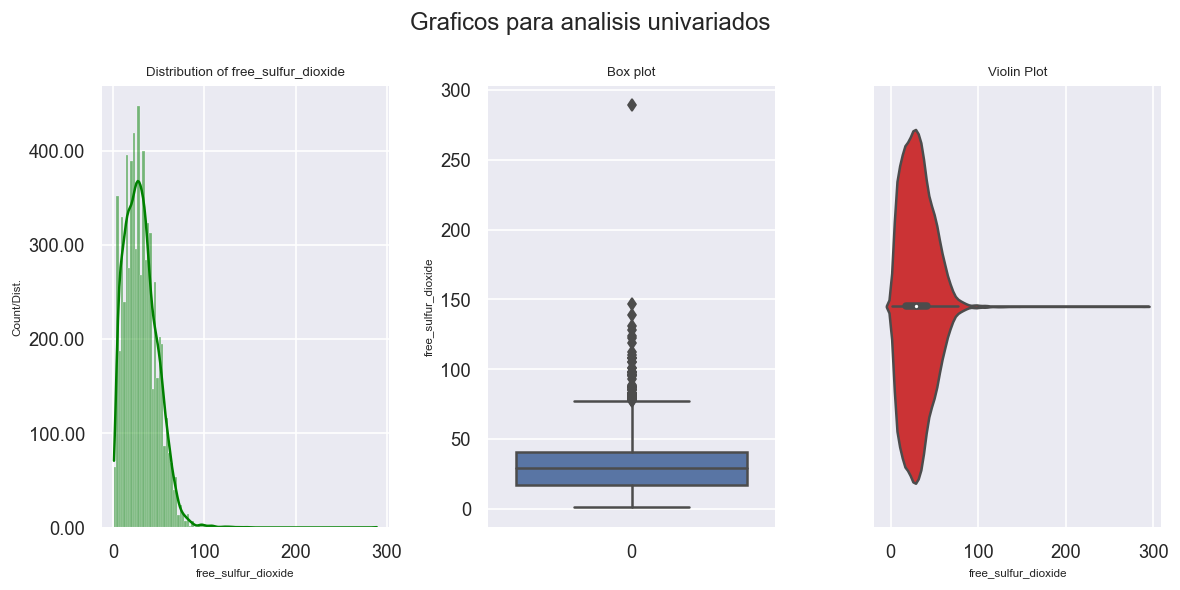

In [40]:
# Analisis univariado de la columna free_sulfur_dioxide
univariate_analysis(dataframe=df_wine, column_name='free_sulfur_dioxide')

In [41]:
# Determinamos el valor limite para los outliers superiores
free_sulfur_dioxide_upper_limit = stats.get_upper_limit_whisker(df_wine['free_sulfur_dioxide']).round(3)
# Filtramos las filas donde free_sulfur_dioxide es mayor a la limite superior del boxplot
free_sulfur_dioxide_greater_upper_limit = df_wine[(df_wine['free_sulfur_dioxide'] > free_sulfur_dioxide_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un free_sulfur_dioxide mayor a la limite superior del boxplot
print(f"El {round(free_sulfur_dioxide_greater_upper_limit['free_sulfur_dioxide'].count() * 100 / df_wine['free_sulfur_dioxide'].count(), 2)} % de los vinos tienen un free_sulfur_dioxide mayor a {free_sulfur_dioxide_upper_limit}")

El 0.95 % de los vinos tienen un free_sulfur_dioxide mayor a 77.0


In [42]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(free_sulfur_dioxide_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 359


## Chlorides

### Descripcion de la columna chlorides 

count    6497.000
mean        0.056
std         0.035
min         0.009
25%         0.038
50%         0.047
75%         0.065
max         0.611
Name: chlorides, dtype: float64


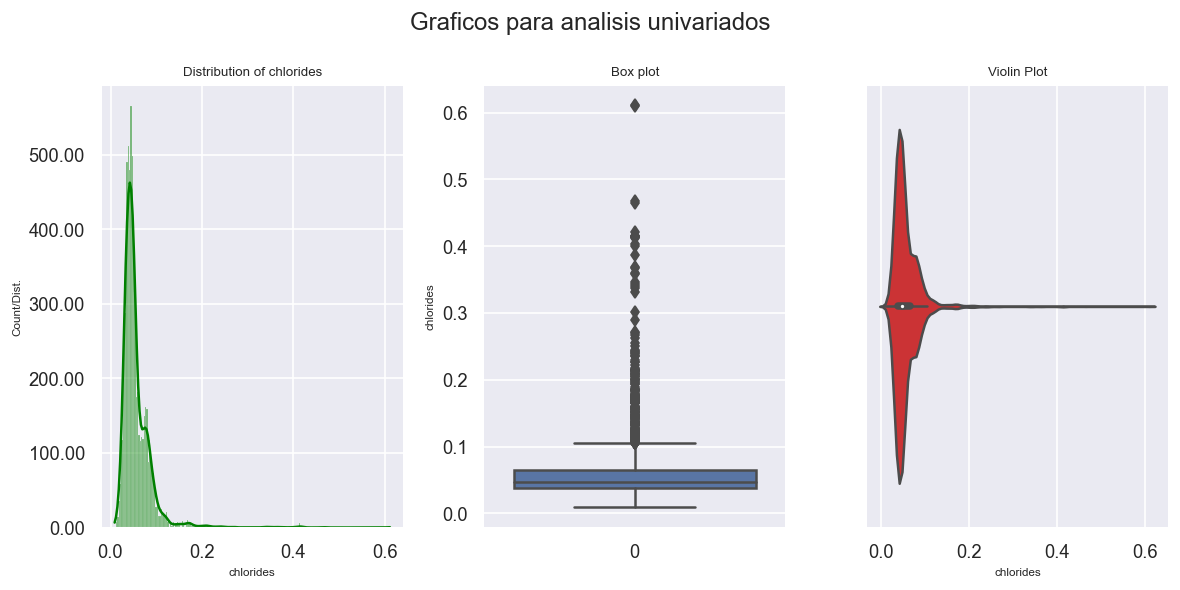

In [43]:
# Analisis univariado de la columna chlorides
univariate_analysis(dataframe=df_wine, column_name='chlorides')

In [44]:
# Determinamos el valor limite para los outliers superiores
chlorides_upper_limit = stats.get_upper_limit_whisker(df_wine['chlorides']).round(3)
# Filtramos las filas donde chlorides es mayor a la limite superior del boxplot
chlorides_greater_upper_limit = df_wine[(df_wine['chlorides'] > chlorides_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un chlorides mayor a la limite superior del boxplot
print(f"El {round(chlorides_greater_upper_limit['chlorides'].count() * 100 / df_wine['chlorides'].count(), 2)} % de los vinos tienen un chlorides mayor a {chlorides_upper_limit}")

El 4.28 % de los vinos tienen un chlorides mayor a 0.106


In [45]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(chlorides_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 582


## Residual sugar

### Descripcion de la columna residual_sugar 

count    6497.000
mean        5.443
std         4.758
min         0.600
25%         1.800
50%         3.000
75%         8.100
max        65.800
Name: residual_sugar, dtype: float64


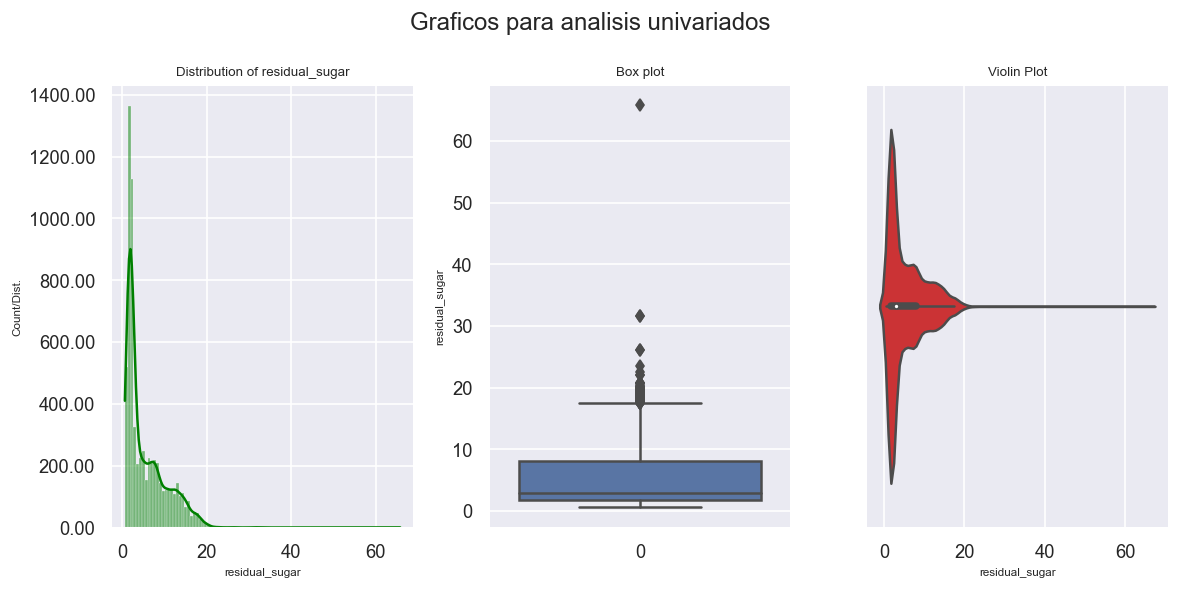

In [46]:
# Analisis univariado de la columna residual_sugar
univariate_analysis(dataframe=df_wine, column_name='residual_sugar')

In [47]:
# Determinamos el valor limite para los outliers superiores
residual_sugar_upper_limit = stats.get_upper_limit_whisker(df_wine['residual_sugar']).round(3)
# Filtramos las filas donde residual_sugar es mayor a la limite superior del boxplot
residual_sugar_greater_upper_limit = df_wine[(df_wine['residual_sugar'] > residual_sugar_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un residual_sugar mayor a la limite superior del boxplot
print(f"El {round(residual_sugar_greater_upper_limit['residual_sugar'].count() * 100 / df_wine['residual_sugar'].count(), 2)} % de los vinos tienen un residual_sugar mayor a {residual_sugar_upper_limit}")

El 1.77 % de los vinos tienen un residual_sugar mayor a 17.55


In [48]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(residual_sugar_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 692


## Citric acid

### Descripcion de la columna citric_acid 

count    6497.000
mean        0.319
std         0.145
min         0.000
25%         0.250
50%         0.310
75%         0.390
max         1.660
Name: citric_acid, dtype: float64


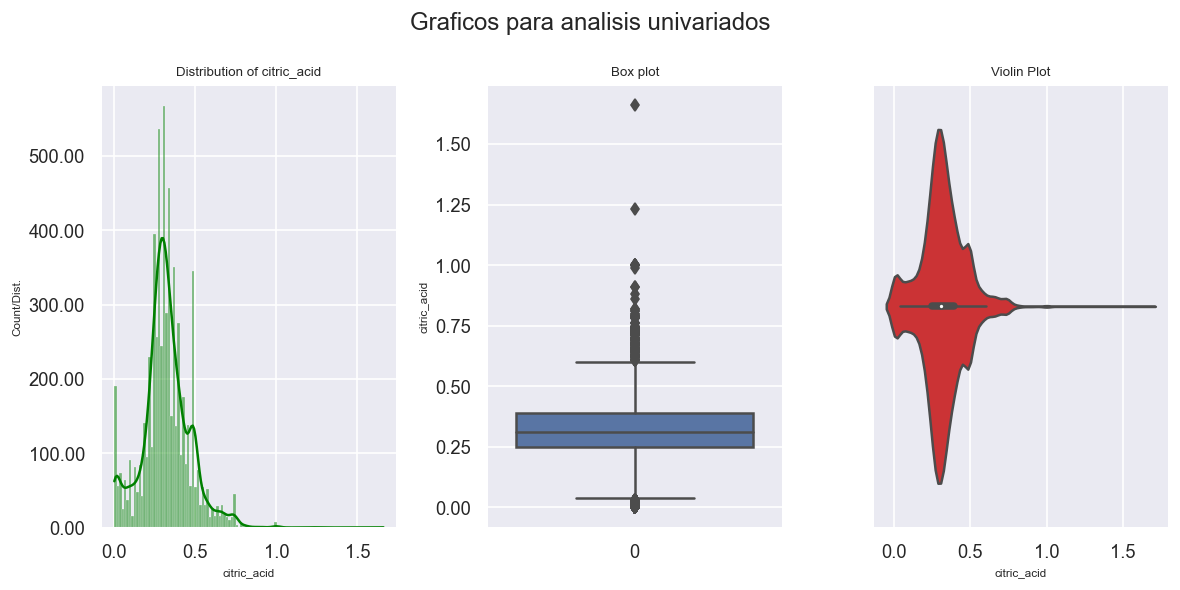

In [49]:
# Analisis univariado de la columna citric_acid
univariate_analysis(dataframe=df_wine, column_name='citric_acid')

In [50]:
# Determinamos el valor limite para los outliers superiores
citric_acid_upper_limit = stats.get_upper_limit_whisker(df_wine['citric_acid']).round(3)
# Deterimos el valor limite para los outliers inferiores
citric_acid_lower_limit = stats.get_lower_limit_whisker(df_wine['citric_acid']).round(3)
# Filtramos las filas donde citric_acid es mayor a la limite superior del boxplot
citric_acid_greater_upper_limit = df_wine[(df_wine['citric_acid'] > citric_acid_upper_limit)]
# Filtramos las filas donde citric_acid es menor a la limite inferior del boxplot
citric_acid_less_lower_limit = df_wine[(df_wine['citric_acid'] < citric_acid_lower_limit)]
# Representacion en porcentaje de los vinos que tienen un citric_acid mayor a la limite superior del boxplot
print(f"El {round(citric_acid_greater_upper_limit['citric_acid'].count() * 100 / df_wine['citric_acid'].count(), 2)} % de los vinos tienen un citric_acid mayor a {citric_acid_upper_limit}")
# Representacion en porcentaje de los vinos que tienen un citric_acid menor a la limite inferior del boxplot
print(f"El {round(citric_acid_less_lower_limit['citric_acid'].count() * 100 / df_wine['citric_acid'].count(), 2)} % de los vinos tienen un citric_acid menor a {citric_acid_lower_limit}")


El 3.54 % de los vinos tienen un citric_acid mayor a 0.6
El 4.29 % de los vinos tienen un citric_acid menor a 0.04


In [51]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(citric_acid_greater_upper_limit.index)
rows_to_drop.extend(citric_acid_less_lower_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 1089


## Volatile acidity

### Descripcion de la columna volatile_acidity 

count    6497.000
mean        0.340
std         0.165
min         0.080
25%         0.230
50%         0.290
75%         0.400
max         1.580
Name: volatile_acidity, dtype: float64


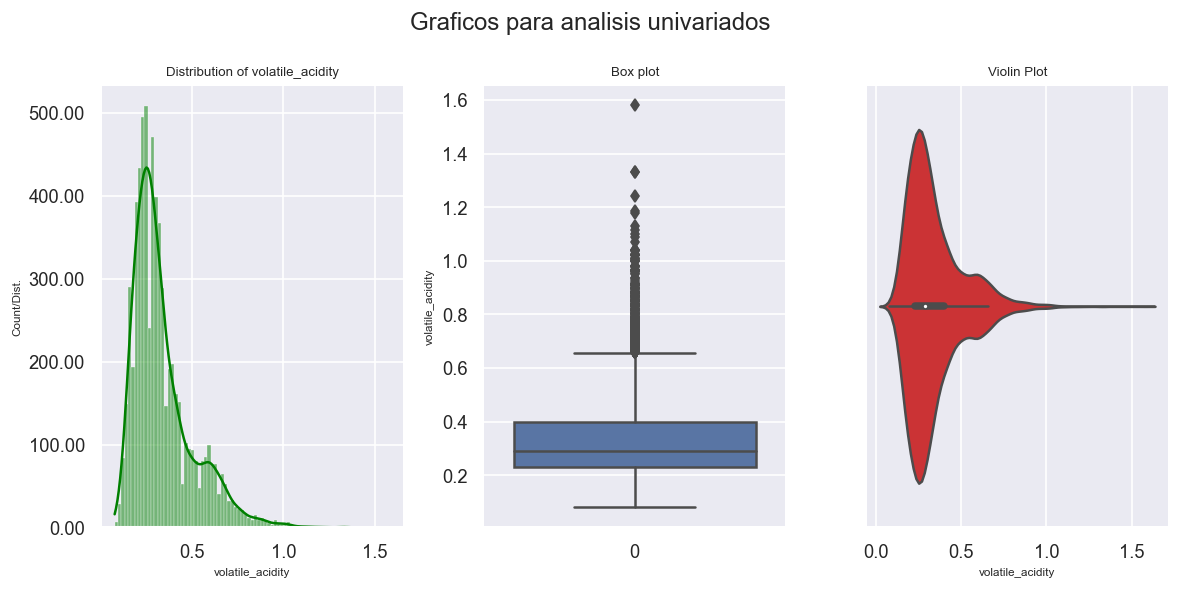

In [52]:
# Analisis univariado de la columna volatile_acidity
univariate_analysis(dataframe=df_wine, column_name='volatile_acidity')

In [53]:
# Determinamos el valor limite para los outliers superiores
volatile_acidity_upper_limit = stats.get_upper_limit_whisker(df_wine['volatile_acidity']).round(3)
# Filtramos las filas donde volatile_acidity es mayor a la limite superior del boxplot
volatile_acidity_greater_upper_limit = df_wine[(df_wine['volatile_acidity'] > volatile_acidity_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un volatile_acidity mayor a la limite superior del boxplot
print(f"El {round(volatile_acidity_greater_upper_limit['volatile_acidity'].count() * 100 / df_wine['volatile_acidity'].count(), 2)} % de los vinos tienen un volatile_acidity mayor a {volatile_acidity_upper_limit}")

El 5.8 % de los vinos tienen un volatile_acidity mayor a 0.655


In [54]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(volatile_acidity_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 1290


## Fixed acidity

### Descripcion de la columna fixed_acidity 

count    6497.000
mean        7.215
std         1.296
min         3.800
25%         6.400
50%         7.000
75%         7.700
max        15.900
Name: fixed_acidity, dtype: float64


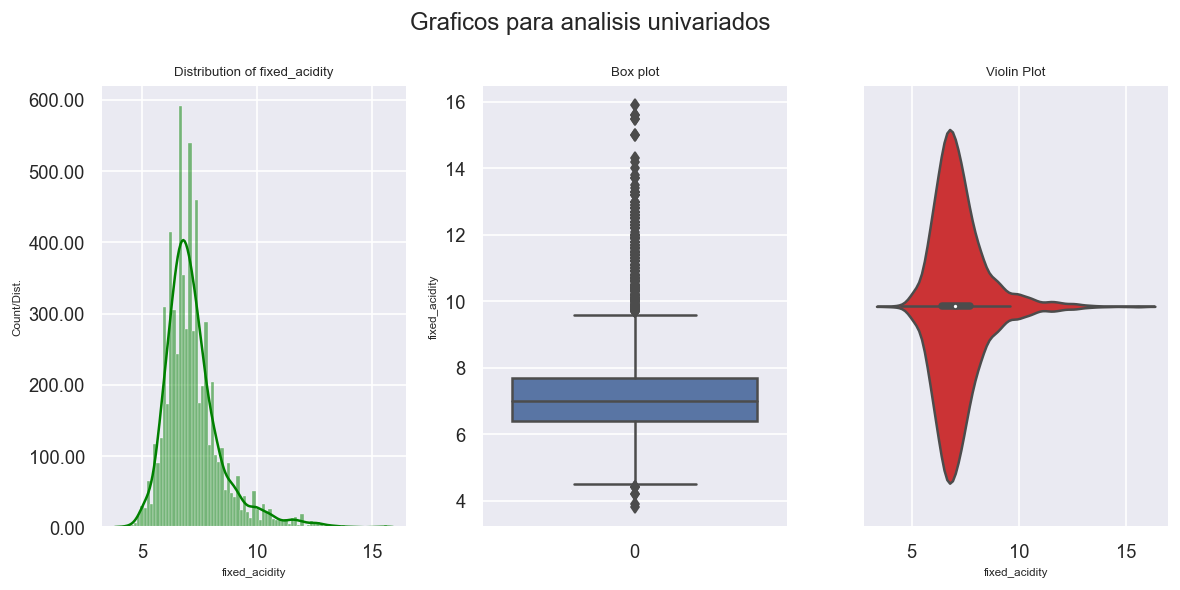

In [55]:
# Analisis univariado de la columna fixed_acidity
univariate_analysis(dataframe=df_wine, column_name='fixed_acidity')

In [56]:
# Determinamos el valor limite para los outliers superiores
fixed_acidity_upper_limit = stats.get_upper_limit_whisker(df_wine['fixed_acidity']).round(3)
# Deterimos el valor limite para los outliers inferiores
fixed_acidity_lower_limit = stats.get_lower_limit_whisker(df_wine['fixed_acidity']).round(3)
# Filtramos las filas donde fixed_acidity es mayor a la limite superior del boxplot
fixed_acidity_greater_upper_limit = df_wine[(df_wine['fixed_acidity'] > fixed_acidity_upper_limit)]
# Filtramos las filas donde fixed_acidity es menor a la limite inferior del boxplot
fixed_acidity_less_lower_limit = df_wine[(df_wine['fixed_acidity'] < fixed_acidity_lower_limit)]
# Representacion en porcentaje de los vinos que tienen un fixed_acidity mayor a la limite superior del boxplot
print(f"El {round(fixed_acidity_greater_upper_limit['fixed_acidity'].count() * 100 / df_wine['fixed_acidity'].count(), 2)} % de los vinos tienen un fixed_acidity mayor a {fixed_acidity_upper_limit}")
# Representacion en porcentaje de los vinos que tienen un fixed_acidity menor a la limite inferior del boxplot
print(f"El {round(fixed_acidity_less_lower_limit['fixed_acidity'].count() * 100 / df_wine['fixed_acidity'].count(), 2)} % de los vinos tienen un fixed_acidity menor a {fixed_acidity_lower_limit}")

El 5.39 % de los vinos tienen un fixed_acidity mayor a 9.65
El 0.11 % de los vinos tienen un fixed_acidity menor a 4.45


In [57]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(fixed_acidity_greater_upper_limit.index)
rows_to_drop.extend(fixed_acidity_less_lower_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 1484


# Limpieza de datos


Procedemos a eliminar los outlier encontrados.

In [58]:
#Eliminamos las filas que contienen outliers y reseteamos el index
print(f"La cantidad de columnas a eliminar es de {len(set(rows_to_drop))}")
df_wine_clean = df_wine.drop(index=rows_to_drop, inplace=False, axis=0).reset_index(drop=True)
print("Dataframe limpio")


La cantidad de columnas a eliminar es de 1484
Dataframe limpio


In [59]:
shape_df_clean = df_wine_clean.shape
print (f"Hay {shape_df_clean[0]} filas y {shape_df_clean[1]} columnas en el dataset de wine")
print (f"Hay {df_wine_clean['style'].nunique()} estilos de vino de como lo son {' y '.join(df_wine_clean['style'].unique()[0:5])}")
print (f"El promedio de alcohol es {round(df_wine_clean['alcohol'].mean(), 3)} y su mediana es {round(df_wine_clean['alcohol'].median(), 3)}")
print (f"El promedio de quality es {round(df_wine_clean['quality'].mean(), 3)} y su mediana es {round(df_wine_clean['quality'].median(), 3)}")

Hay 5013 filas y 13 columnas en el dataset de wine
Hay 2 estilos de vino de como lo son red y white
El promedio de alcohol es 10.568 y su mediana es 10.4
El promedio de quality es 5.895 y su mediana es 6.0


In [60]:
# Por ultimo guardamos el dataframe limpio en un archivo csv
WINE_CLEAN_CSV_PATH = data_dir("intermediate", "df_wine_clean.csv")
df_wine_clean.to_csv(WINE_CLEAN_CSV_PATH, index=False)
